# Data-Git-Hub: Exploratory Data Analysis Project

Author: Data-Git-Hub 

Clone: denisecase/datafun-04-notebooks

Date: 02FEB2025

---

## Imports

- Importing the necessary libraries and datasets.

---

In [58]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

print("Starting out with Jupyter.")

Starting out with Jupyter.


## Load Data

- Loading dataset from Iris due to its well-known dataset for data science and machine learning.
- Using sns.load_dataset() function and passing in the 'iris' (the name without .csv) to populate our DataFrame.

---

In [59]:
# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Initial Data Inspection

- Getting a preview of the data allows for a better understand of the shape of dataset.
- The following lines of code allow for summary of the IRIS dataset.

---

In [60]:
# Specify the number of rows to display
iris_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Initial Descriptive Statistics

- Using the DataFrame describe() command, we are able to assess some basic statistical information from the dataset.
- The initial overview allows us to look at what tools we can additional add to interpret the results of the dataset for trends or projections.

---

In [61]:
# Inspect summary statistics for numerical columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Initial Data Distribution for Numerical Columns

- Using a histogram to show the distribution of the data within bands of similarity.


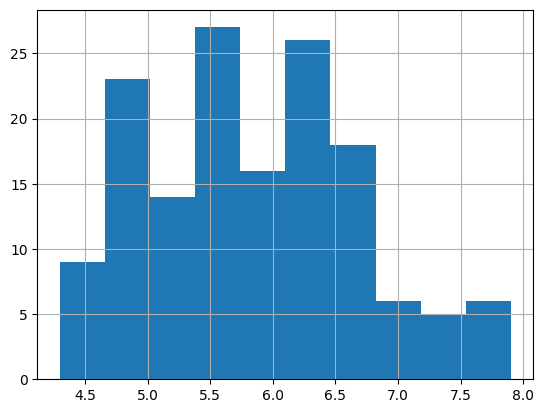

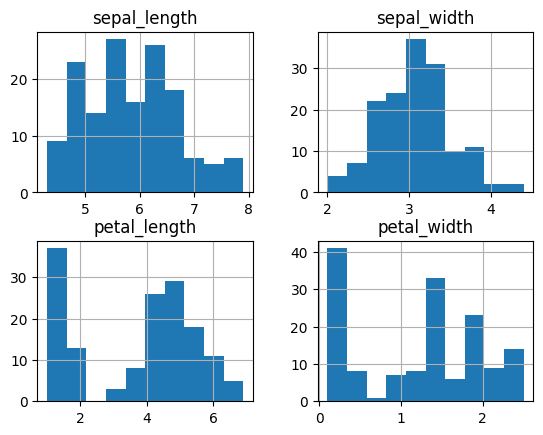

In [62]:
# Inspect histogram by one numerical column
iris_df['sepal_length'].hist()

# Inspect histograms for ALL numerical columns
iris_df.hist()

# Show all plots
matplotlib.pyplot.show()

- The sepal_width has the closest to a standard bell curve.

---

## Initial Data Distribution for Categorical Columns


Value counts for species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


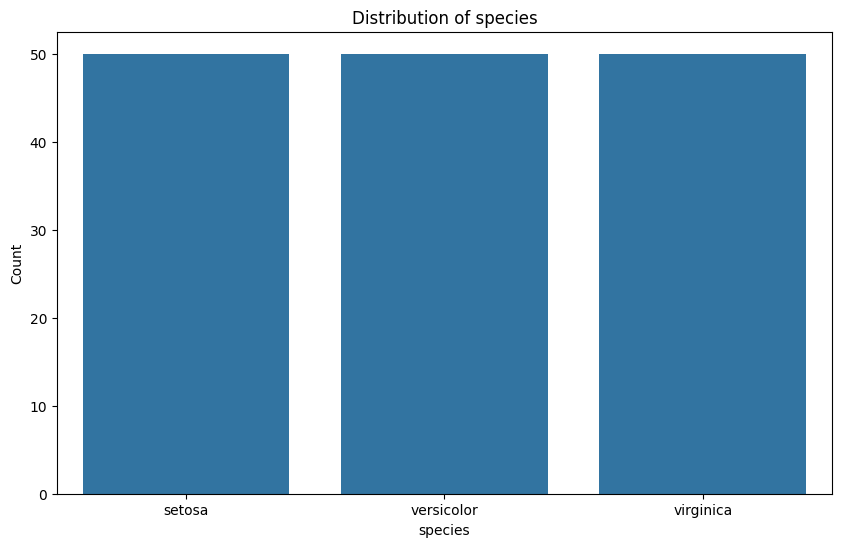

In [63]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
import matplotlib.pyplot as plt
iris_df: pd.DataFrame = sns.load_dataset('iris')

# Display value counts for all categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts for {col}:")
    print(iris_df[col].value_counts())  # Display value counts in text format
    
    # Display count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=iris_df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

- The different species of the above graphic shows an even count of each type.

---

## Initial Data Transformation and Feature Engineering

- Data Cleaning
  - Handling missing values.
  - Removing Duplicates.

- Data Transformation
  - Renaming for clarity.
  - Creating new features.

In [67]:
# ---- DATA CLEANING ----
# Handling missing values (fill with column median for numerical or mode for categorical)
iris_df.fillna(iris_df.median(numeric_only=True), inplace=True)
iris_df.fillna(iris_df.mode().iloc[0], inplace=True)

# Removing duplicate rows
iris_df.drop_duplicates(inplace=True)

# Renaming columns for clarity
iris_df.rename(columns={'sepal_length': 'Sepal Length', 'sepal_width': 'Sepal Width',
                        'petal_length': 'Petal Length', 'petal_width': 'Petal Width'}, inplace=True)

# ---- FEATURE ENGINEERING ----
# Creating new features using updated column names
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['Sepal Width']  # ✅ FIXED
iris_df['Petal Area'] = iris_df['Petal Length'] * iris_df['Petal Width']

# Display first few rows
iris_df.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,species,Sepal Area,Petal Area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


- Added .head() to insure changes are being made.

---

## Initial Visualizations

- With the data cleaned and transformed, the next step is to visualize relationships between features.
We will use Seaborn and Matplotlib to generate different charts, including:
- A **Pairplot** to understand relationships between all numerical features.
- A **Scatter plot** to examine the relationship between **Sepal Length** and **Sepal Area**, categorized by species.

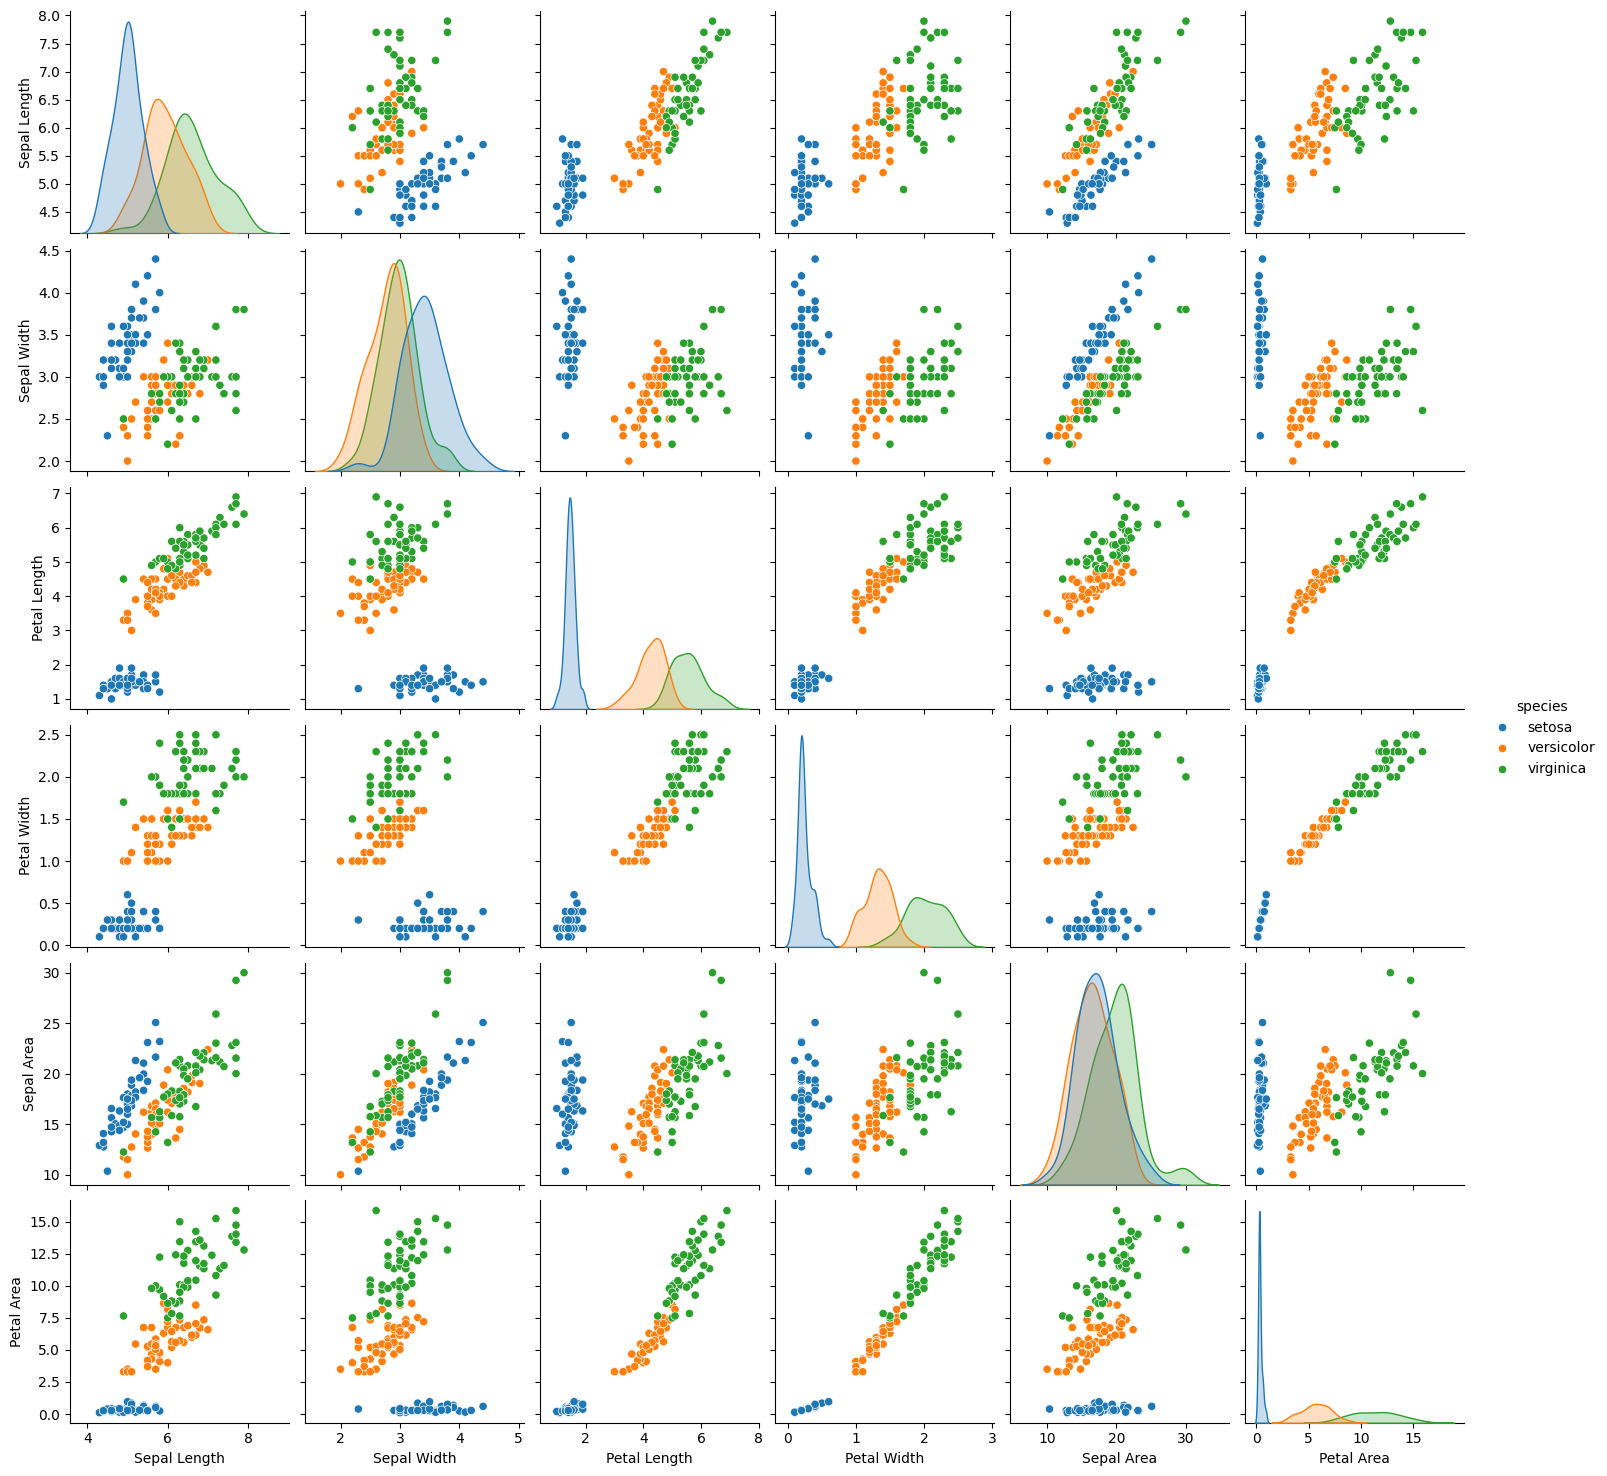

In [68]:
# Create a pairplot of the Iris dataset
sns.pairplot(iris_df, hue='species', diag_kind='kde')

# Show the plot
plt.show()


- Observations
  - Sepal Length vs. Sepal Width, Shows some separation between species but has overlap.
  - Petal Length vs. Petal Width, Displays clear clustering among species, making it a strong differentiator.
  - Diagonal KDE plots, Show the distribution of each feature per species.
  - Setosa is the most distinct species, whereas Versicolor and Virginica have some overlap.


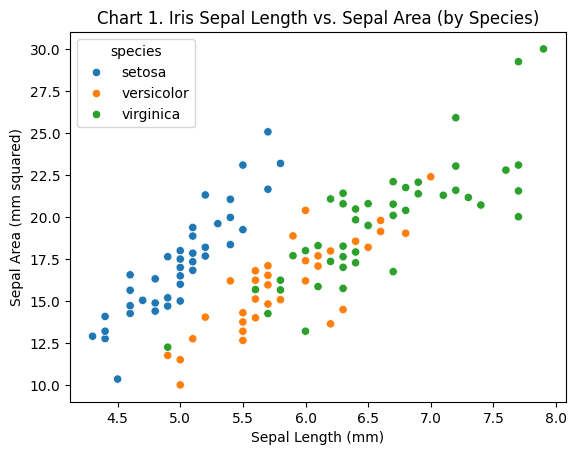

In [69]:
# Create a scatter plot
scatter_plt = sns.scatterplot(data=iris_df, x="Sepal Length", y="Sepal Area", hue="species")

# Set axis labels
scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")

# Set the title
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

# Show the plot
plt.show()


- Observations
  - Positive correlation between Sepal Length and Sepal Area is observed.
  - Setosa species tend to have lower Sepal Length and smaller Sepal Area.
  - Virginica species tend to have higher Sepal Length and larger Sepal Area.
  - There is some overlap between Versicolor and Virginica, but general trends are distinguishable.

---